# Implementing Logic Gates
---

In [1]:
import numpy as np

## AND Gate

In [2]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


```python
if __name__ = '__main__':
```
If this file is loaded in other Jupyter Notebook file, the codes below this line will not be executed.

## NAND Gate

In [3]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## OR Gate

In [4]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


## XOR Gate

To implement a XOR Gate, we need to stack multiple layers of Perceptrons. This is because the gate cannot be implemented with a single Perceptron.

In [5]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# Activation Functions
---

Biological neurons are composed of Heaviside activation functions. However, for artificial neural networks, we need to apply other activiation functions.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = [-1, 1, 2]
x = np.array(x)

In [8]:
def identity_function(x):
    return x

identity_function(x)

array([-1,  1,  2])

In [9]:
def step_function(x):
    return np.array(x > 0, dtype = int)

# It returns 1 and 0 instead of 'True' and 'False' respectively.
step_function(x)

array([0, 1, 1])

In [10]:
# FYI
np.array(np.array([-1, 1, 2]) > 0)

array([False,  True,  True])

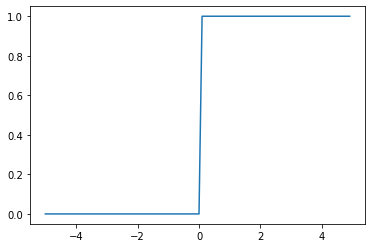

In [11]:
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

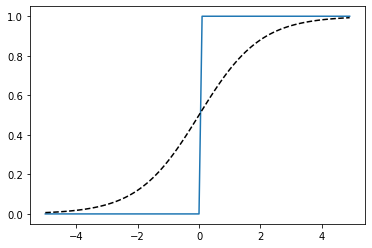

In [13]:
Y2 = sigmoid(X)
plt.plot(X, Y)
plt.plot(X, Y2, 'k--')

In [14]:
def ReLU(x):
    return np.maximum(0, x)

ReLU(x)

array([0, 1, 2])

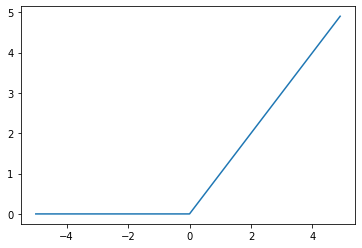

In [15]:
Y3 = ReLU(X)
plt.plot(X, Y3)

# Implementing a Simple Neural Network with Two Hidden Layers
---

In [16]:
import numpy as np

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    return x

def init_network():
    # Define an empty dictionary.
    network = {}
    # weights in the first hidden layer (three neurons)
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    # biases in the first hidden layer (three neurons)
    network['b1'] = np.array([0.1, 0.2, 0.3])
    # weights in the second hidden layer (two neurons)
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    # biases in the second hidden layer (two neurons)
    network['b2'] = np.array([0.1, 0.2])
    # weights in the output layer (two neurons)
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    # biases in the output layer (two neurons)
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    
    return identity_function(a3)

In [18]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# Implementing a Neural Network
---

In [19]:
import sys, os
sys.path.append(os.pardir)
sys.path.append(os.getcwd())
import numpy as np
import pickle
from keras.datasets import mnist
import time

In [20]:
def get_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    return X_test, y_test

# loading an already trained model
def init_network():
    with open("sample_weight.pkl", 'rb') as file:
        network = pickle.load(file)
    # network format: dictionary
    return network

def soft_max(x):
    if x.ndim == 2: # if an input is a batch
                    # -> x is N by the number of categories
        # The reason why it's going through such a complicated process is
        # related to the way NumPy broadcasts.
        # See the NumPy documents.
        x = x.T
        # to avoid the overflow problem
        x = x - np.max(x, axis = 0)
        y = np.exp(x) / np.sum(np.exp(x), axis = 0)
        return y.T
    
    # else (if an input is an observation)
    # -> x is 1 by the number of categories
    # to avoid the overflow problem
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    
    return soft_max(a3)

In [21]:
start = time.time()
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i].reshape(784,))
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))
print(f"Elapsed Time: {time.time() - start} seconds")

C:\Users\1suof\AppData\Local\Temp\ipykernel_39688\2659972463.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9207
Elapsed Time: 1.5867609977722168 seconds


In [22]:
start = time.time()
# Using batch
batch_size = 100
accuracy_cnt = 0

x, t = get_data()
network = init_network()
for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch.reshape(batch_size, 784,))
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i + batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))
print(f"Elapsed Time: {time.time() - start} seconds")

Accuracy: 0.9207
Elapsed Time: 0.2618527412414551 seconds


C:\Users\1suof\AppData\Local\Temp\ipykernel_39688\2659972463.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


C:\Users\1suof\AppData\Local\Temp\ipykernel_39688\2659972463.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[8, 33, 59, 92, 111, 119, 121, 124, 144, 149, 195, 211, 217, 233, 241, 247, 250, 251, 259, 300, 307, 313, 321, 325, 340, 341, 347, 352, 358, 359, 381, 386, 389, 400, 412, 435, 445, 448, 449, 468, 478, 479, 483, 488, 495, 502, 507, 511, 531, 543, 551, 565, 569, 578, 582, 583, 591, 610, 619, 627, 628, 629, 638, 658, 659, 684, 687, 689, 691, 692, 707, 710, 717, 720, 740, 786, 791, 810, 829, 839, 857, 874, 881, 900, 926, 947, 950, 956, 959, 960, 965, 982, 1014, 1032, 1033, 1039, 1044, 1055, 1062, 1068, 1073, 1082, 1096, 1101, 1107, 1112, 1114, 1131, 1152, 1153, 1157, 1166, 1181, 1191, 1192, 1194, 1198, 1204, 1206, 1224, 1226, 1228, 1232, 1242, 1243, 1247, 1256, 1260, 1272, 1283, 1289, 1299, 1319, 1325, 1326, 1328, 1337, 1347, 1357, 1378, 1391, 1393, 1403, 1404, 1410, 1413, 1421, 1429, 1440, 1444, 1453, 1465, 1466, 1467, 1476, 1494, 1500, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1581, 1595, 1607, 1609, 1611, 1614, 1634, 1641, 1671, 1678, 1681, 1696, 1709, 1716, 1718, 1721, 1722, 1730, 1732

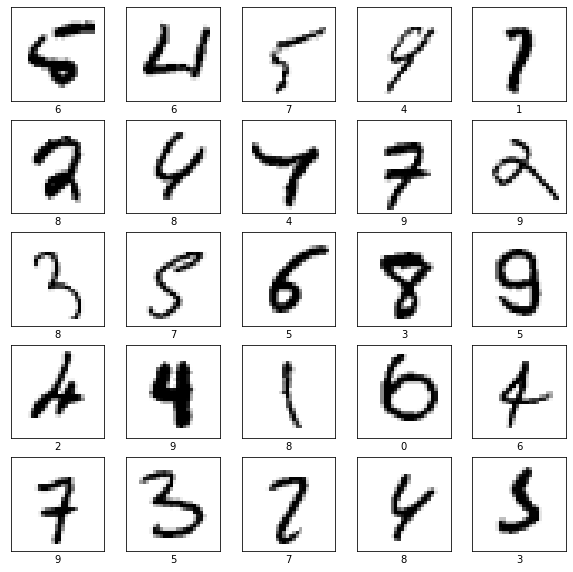

In [23]:
# collecting incorrectly classified data
x, t = get_data()
network = init_network()
error = []
wrong_answers = []
for i in range(len(x)):
    y = predict(network, x[i].reshape(784,))
    p = np.argmax(y)
    if p != t[i]:
        error.append(i)
        wrong_answers.append(p)
        
print(error)

plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[error[i]], cmap = plt.cm.binary)
    plt.xlabel(wrong_answers[i])
plt.show()

# Loss Functions
---

## MSE

In [24]:
def mean_squared_error(y, t):
    return 0.5 * np.sum(y - t)**2

## Cross Entropy Error

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1: # if an input is an observation
                    # y is 1 by the number of categories
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    # if the training dataset is one-hot encoded..
    if t.size == y.size:
        t = t.argmax(axis = 1)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

For more information regarding Entropy, see the below.
https://www.youtube.com/watch?v=aoK5N1i9B1Q&list=PLBiQZMT3oSxW1RS1hn2jWBgswh0nlcgQZ&index=7

# Numerical Gradient
---

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Univariate Numerical Gradient

In [30]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

def function_1(x):
    return 0.01 * x**2 + 0.1 * x

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y

0.1999999999990898


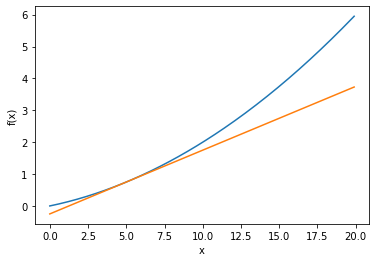

In [31]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5) # the outcome: lambda function
y2 = tf(x) # Insert x into the lambda function tf.

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## Multivariate Numerical Gradient

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25]
------------------------------
[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25]
------------------------------
[[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 

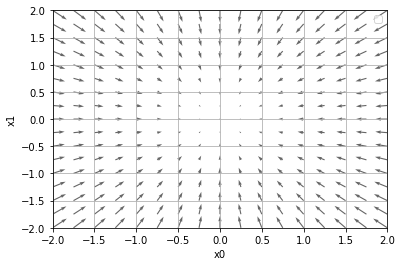

In [47]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        temp_val = x[idx]
        
        # f(x + h)
        x[idx] = float(temp_val) + h
        fxh1 = f(x)
        
        # f(x - h)
        x[idx] = temp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = temp_val # Restore the original value of x.
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X): # idx: batch
                                    # x: inputs
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad
    
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis = 1)
    
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    print(x0)
    print("------------------------------")
    print(x1)
    print("------------------------------")
    
    X, Y = np.meshgrid(x0, x1)
    print(X)
    print("------------------------------")
    print(Y)
    
    X = X.flatten()
    Y = Y.flatten()
    
    # np.c_[X, Y] -> Form a 2D numpy array setting X as the first column
    # and Y as the second column.
    # example
    # a = np.array([1, 2])
    # b = np.array([3, 4])
    # np.c_[a, b]
    grad = numerical_gradient(function_2, np.c_[X, Y])
    
    plt.figure()
    plt.quiver(X, Y, -grad[:, 0], -grad[:, 1], angles = "xy",
              color = "#666") # quiver: 화살통
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

C:\Users\1suof\AppData\Local\Temp\ipykernel_39688\3369199842.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


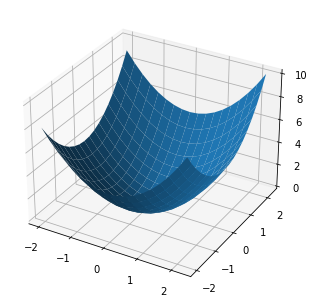

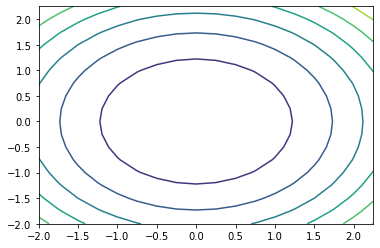

C:\Users\1suof\AppData\Local\Temp\ipykernel_39688\3369199842.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


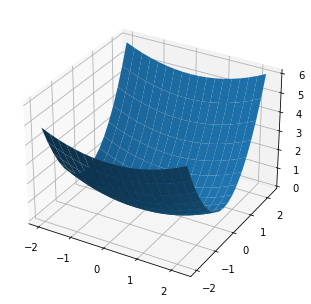

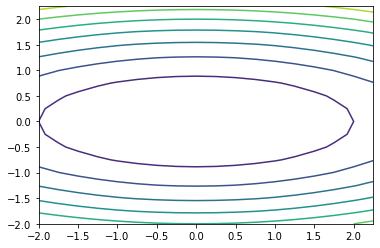

C:\Users\1suof\AppData\Local\Temp\ipykernel_39688\3369199842.py:21: RuntimeWarning: invalid value encountered in sqrt
  Z = np.sqrt(9 - X**2 - Y**2)
C:\Users\1suof\AppData\Local\Temp\ipykernel_39688\3369199842.py:23: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


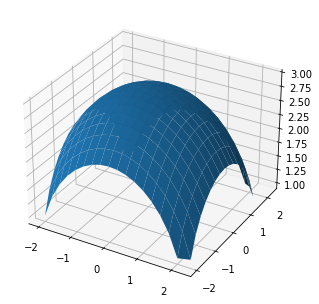

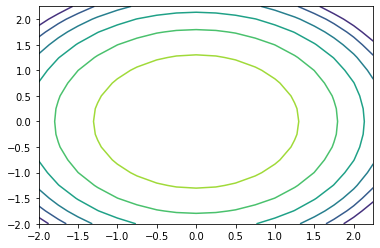

C:\Users\1suof\AppData\Local\Temp\ipykernel_39688\3369199842.py:31: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


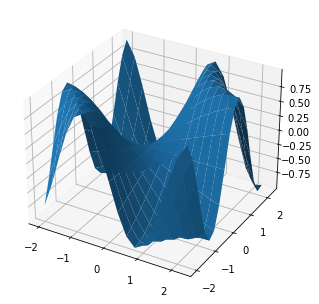

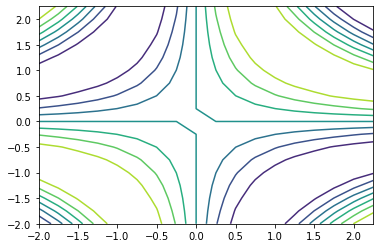

In [34]:
x = np.arange(-2, 2.5, 0.25)
y = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X, Y, Z)
plt.show()

Z = (1/5) * X**2 + Y**2
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X, Y, Z)
plt.show()

Z = np.sqrt(9 - X**2 - Y**2)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X, Y, Z)
plt.show()

Z = np.sin(X * Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X, Y, Z)
plt.show()

## Gradient Descent

In [51]:
def gradient_descent(f, init_x, lr = 0.01, num_steps = 100):
    x = init_x
    x_history = []
    
    for i in range(num_steps):
        x_history.append(x.copy()) # Must use copy().
                                   # If not, you will see only
                                   # the terminal value.
                                   # Keep in mind that
                                   # variables are memory addresses.
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x, np.array(x_history)

def function_3(x):
    return x[0]**2 + x[1]**2

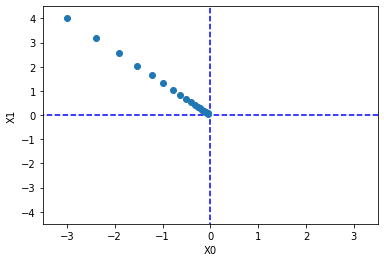

In [69]:
init_x = np.array([-3.0, 4.0])
lr = 0.1
num_steps = 20
x, x_history = gradient_descent(function_3, init_x, lr = lr,
                                num_steps = num_steps)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()